# Interpolation
$$ Ryumei Nakada$$

ソースコードは[こちら](https://github.com/nswa17/MyInterpolations.jl/blob/master/src/MyInterpolations.jl)

In [1]:
#Pkg.clone("https://github.com/nswa17/MyInterpolations.jl")
using MyInterpolations
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
Pkg.test("MyInterpolations")

INFO: Testing MyInterpolations


Test Summary:                | Pass  Total
  Testing linear interporation |   13     13


これを用いて対数関数を線形補間してみる. 
cgridとして[1, 10]を5分割した配列をとり, logを適用した値をcvalに格納.

In [4]:
cgrid = linspace(1, 10, 5)
cvals = log(cgrid)

a = LinearInterpolation(cgrid, cvals)

MyInterpolations.LinearInterpolation([1.0,3.25,5.5,7.75,10.0],[0.0,1.17865,1.70475,2.04769,2.30259])

この線形補間された関数とlogをplotしてみる


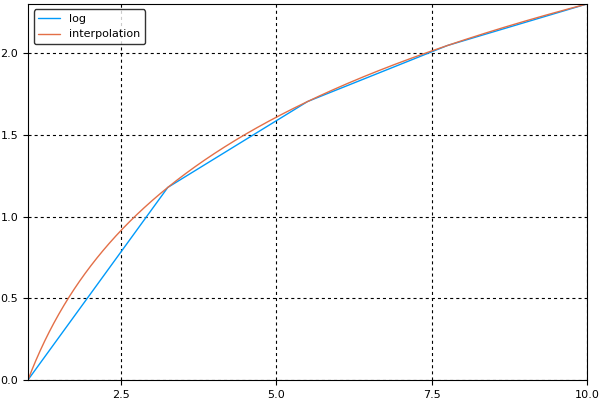

In [5]:
grid = linspace(1, 10, 1000)
plot(cgrid, cvals, label="log")
plot!(grid, log(grid), label="interpolation")

# 同様に三角関数を線形補間してみる.
cgridとして[-5π,  5π]を30分割した配列をとり, sinを適用した値をcvalに格納.

In [6]:
cgrid = linspace(-5pi, 5pi, 30)
cvals = sin(cgrid)

b = LinearInterpolation(cgrid, cvals)

MyInterpolations.LinearInterpolation([-15.708,-14.6247,-13.5413,-12.458,-11.3747,-10.2914,-9.20812,-8.12481,-7.0415,-5.95819  …  5.95819,7.0415,8.12481,9.20812,10.2914,11.3747,12.458,13.5413,14.6247,15.708],[-6.12323e-16,-0.883512,-0.827689,0.108119,0.928977,0.762162,-0.21497,-0.96355,-0.687699,0.319302  …  -0.319302,0.687699,0.96355,0.21497,-0.762162,-0.928977,-0.108119,0.827689,0.883512,6.12323e-16])

この線形補間された関数とsinをplotしてみる.


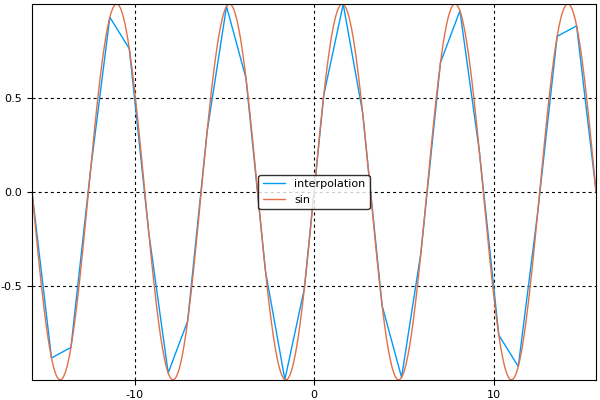

In [7]:
grid = linspace(-5pi, 5pi, 1000)
plot(cgrid, cvals, label="interpolation")
plot!(grid, sin(grid), label="sin")

この残渣をプロットしてみると,


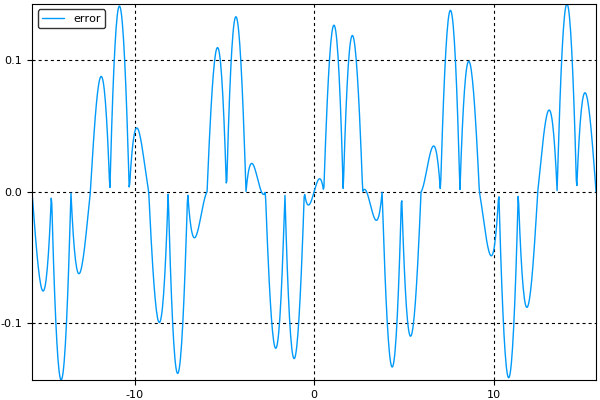

In [8]:
fgrid = linspace(-5pi, 5pi, 1000)
plot(fgrid, sin(grid)-b.(grid), label="error")

$\exp^{-\frac{1}{2} x^2}$を補間してみる.
cgridとして[-5,  5]を20分割した配列をとり, 補間した値をcvalに格納.


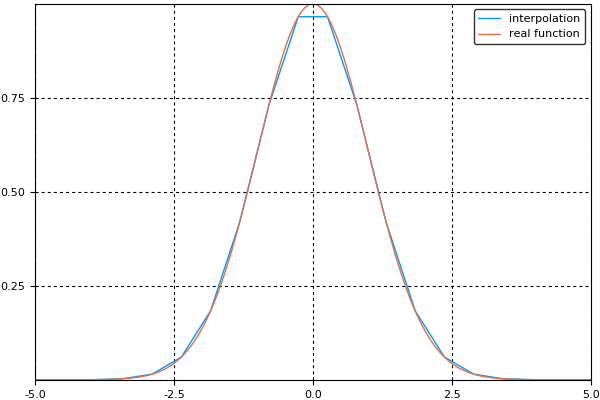

In [9]:
cgrid = linspace(-5, 5, 20)
cvals = exp(-1/2.*cgrid.^2)
c = LinearInterpolation(cgrid, cvals)

grid = linspace(-5, 5, 1000)
plot(cgrid, cvals, label="interpolation")
plot!(grid, exp(-1/2 .* grid .^2), label="real function")

この補間の残渣をプロットしてみる.


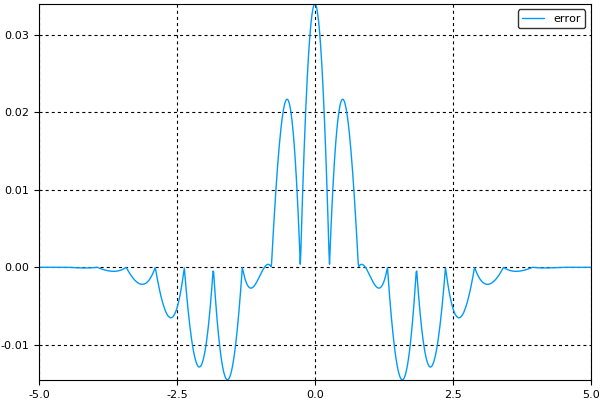

In [10]:
grid = linspace(-5, 5, 1000)
plot(grid, exp(-1/2 .* grid .^2) - c.(grid), label="error")

正規分布の密度関数に関して, 補間に用いる点の数を4から20まで変えたものをプロットしてみる.


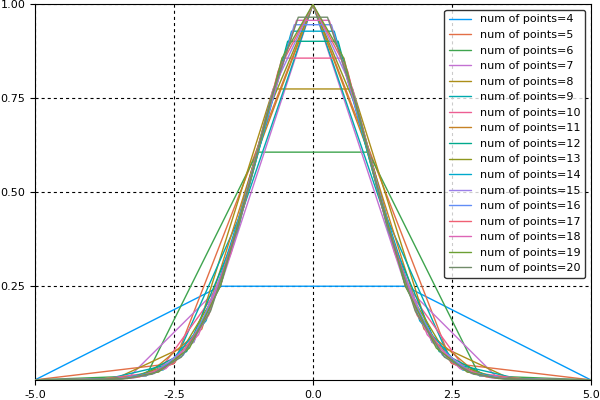

In [11]:
for (n, i) in enumerate(4:20)
    cgrid = linspace(-5, 5, i)
    cvals = exp(-1/2.*cgrid.^2)
    p = n == 1 ? plot : plot!
    p(cgrid, cvals, label="num of points=$i")
end
plot!()

それぞれの残渣をプロットしてみる.


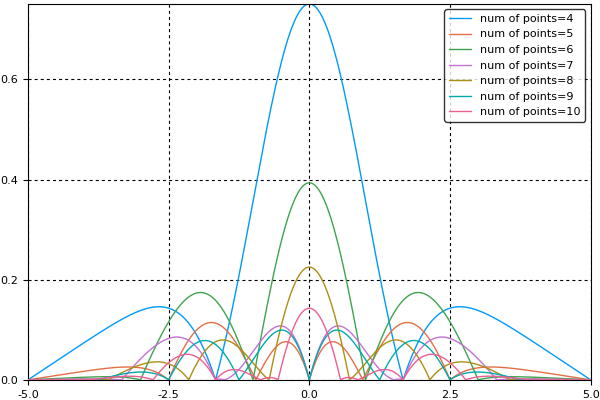

In [12]:
f(x) = exp(-1/2*x^2) 
grid = linspace(-5, 5, 1001)
integrated_squared_errors = []
point_range = 4:10

for (n, i) in enumerate(point_range)
    cgrid = linspace(-5, 5, i)
    cvals = f.(cgrid)
    c = LinearInterpolation(cgrid, cvals)
    p = n == 1 ? plot : plot!
    err(x) = abs(f(x) - c(x))
    push!(integrated_squared_errors, quadgk(x->err(x), -5, 5)[1])
    p(grid, err.(grid), label="num of points=$i")
end
plot!()

それぞれの誤差を補間範囲[-5, 5]上で積分すると, 


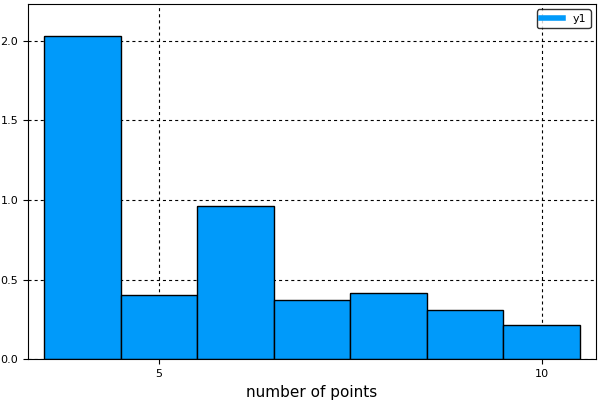

In [13]:
bar(collect(point_range), integrated_squared_errors, xlabel="number of points")

補間に使う点のx座標が均等に分布している場合, 正規密度に関しては上のような値になる. 

対数関数の場合は,


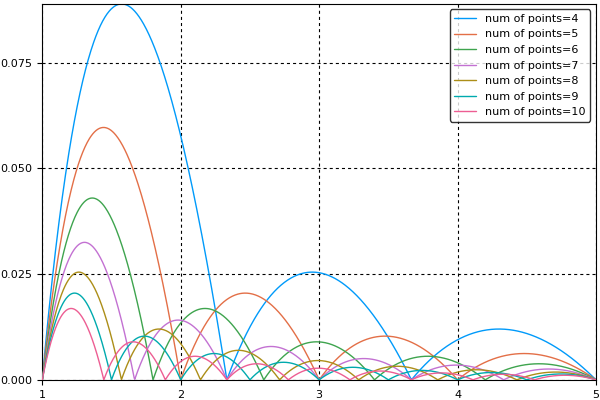

In [14]:
g(x) = log(x)
grid = linspace(1, 5, 1001)
integrated_squared_errors = []
point_range = 4:10

for (n, i) in enumerate(point_range)
    cgrid = linspace(1, 5, i)
    cvals = g.(cgrid)
    c = LinearInterpolation(cgrid, cvals)
    p = n == 1 ? plot : plot!
    err(x) = abs(g(x) - c(x))
    push!(integrated_squared_errors, quadgk(x->err(x), 1, 5)[1])
    p(grid, err.(grid), label="num of points=$i")
end
plot!()


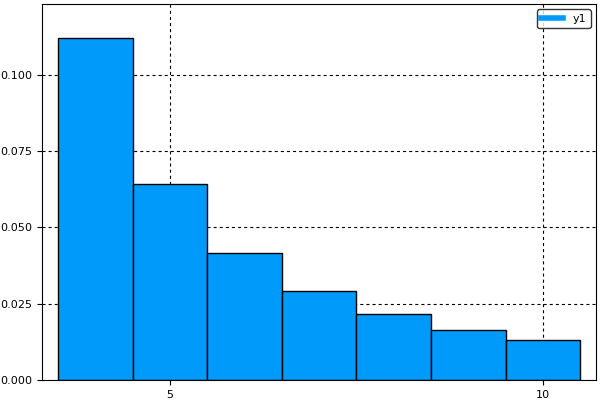

In [15]:
bar(point_range, integrated_squared_errors)

実数から複素数への関数を補間してみる.

In [16]:
func1{T <: Real}(x::T) = 2im * x^2 - x + im

func1 (generic function with 1 method)


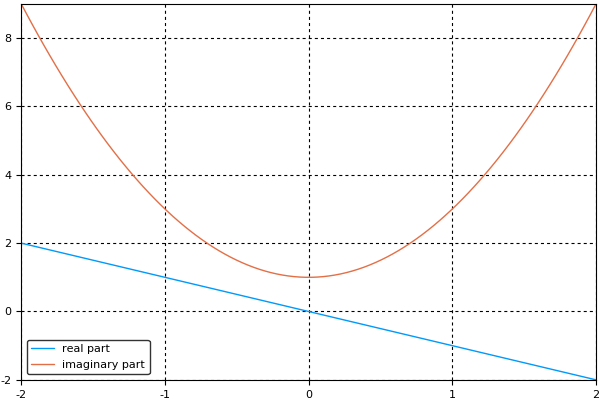

In [17]:
grid = linspace(-2, 2, 100)
plot(grid, real(func1.(grid)), label="real part")
plot!(grid, imag(func1.(grid)), label="imaginary part")

In [18]:
cgrid = linspace(-2, 2, 6)
cvals = func1.(cgrid)
d = LinearInterpolation(cgrid, cvals)

MyInterpolations.LinearInterpolation([-2.0,-1.2,-0.4,0.4,1.2,2.0],Complex{Float64}[2.0+9.0im,1.2+3.88im,0.4+1.32im,-0.4+1.32im,-1.2+3.88im,-2.0+9.0im])


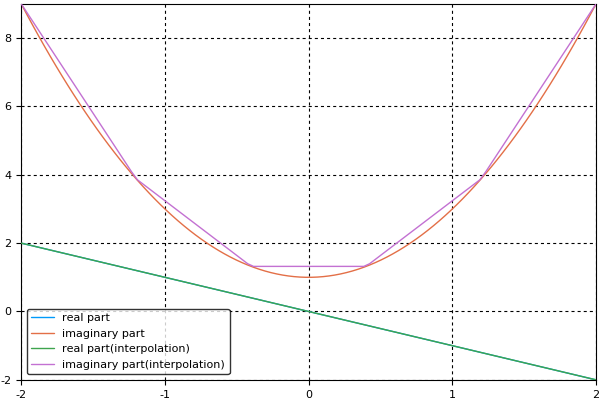

In [19]:
grid = linspace(-2, 2, 100)
plot(grid, real(func1.(grid)), label="real part")
plot!(grid, imag(func1.(grid)), label="imaginary part")
plot!(grid, real(d.(grid)), label="real part(interpolation)")
plot!(grid, imag(d.(grid)), label="imaginary part(interpolation)")